In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from detection.bin.cnndetection import read_data
X_train, X_val, X_test, Y_train, Y_val, Y_test = read_data()
model_path = './save_weights/resNet_34.ckpt'
model = tf.keras.models.load_model(model_path)
predict = model.predict(X_test)
probabilities = tf.nn.softmax(predict, axis=-1)  
predicted_class = np.argmax(probabilities, axis=-1)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, predicted_class)


Category labels: {'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}
Processing Mild Dementia...
Processing Moderate Dementia...
Processing Non Demented...
Processing Very mild Dementia...
Category labels: {'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}
Processing Mild Dementia...
Processing Moderate Dementia...
Processing Non Demented...
Processing Very mild Dementia...
Training data shape: (2816, 224, 224, 3)
Validation data shape: (704, 224, 224, 3)
Testing data shape: (1248, 224, 224, 3)
Training labels shape: (2816, 4)
Validation labels shape: (704, 4)
Testing labels shape: (1248, 4)


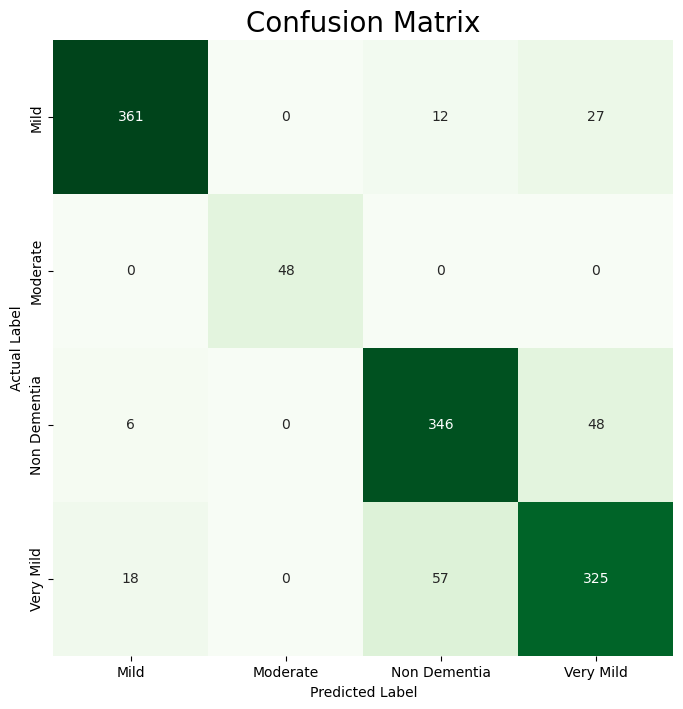

In [12]:
class_labels = ['Mild', 'Moderate', 'Non Dementia', 'Very Mild']
plt.figure(figsize=(8,8),facecolor = None)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", 
            xticklabels=class_labels, 
            yticklabels=class_labels,
            cbar=False)
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig("confusion_matrix.png", transparent=True)
plt.show()

Model performs not well over initial stages, the very mild. 

Specificity and Sensitivity between Non Dementia and Very Mild

In [9]:
TN = cm[2,2]
TP = cm[3,3]   
FP = cm[2,3] 
FN = cm[3,2]


In [10]:
print("Sensitivity: ", TP/(TP+FN))
print("Specificity: ", TN/(TN+FP))

Sensitivity:  0.8507853403141361
Specificity:  0.8781725888324873
